In [96]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [97]:
prots = pd.read_csv('F:/HFX-2022-DATA-Searched/20220819_FMD_Rat_Liver_SP/20220901_FMD_Rat_Liver_6plex_TMT_300ng_MQ1.6/Significant_Proteomes_New/Dose-dependent_Day1/Protein_Groups_1Day_20mg& 50mg_merge_SP_V2.csv')

In [98]:
prot_data = prots[
    [
        "1Day_0mg/0mg",
        "1Day_20mg/0mg",
        "1Day_50mg/0mg",
    ]
].values
scaled_prot_data = StandardScaler().fit_transform(prot_data)

In [123]:
def draw_umap(n_clusters, n_neighbors, min_dist=0.05, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    kmeans_labels = cluster.KMeans(n_clusters).fit_predict(scaled_prot_data)
    embedding = fit.fit_transform(scaled_prot_data);
    plt.scatter(
    embedding[:,0],
    embedding[:,1],
    c=kmeans_labels,
    cmap='Spectral', s=10
    )
    
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.xscale('symlog', base=2)
    plt.yscale('symlog', base=2)
    
    plt.xlabel("UMAP1", size=14)
    plt.ylabel("UMAP2", size=14)
    #plt.axis('off')
    
    
    plt.annotate("n_clusters = {}".format(n_clusters), xy=(5,20), xycoords='axes pixels', size=12)
    plt.annotate("n_neighbors = {}".format(n_neighbors), xy=(5,5), xycoords='axes pixels', size=12)
        
    plt.title(title, fontsize=18)
    plt.savefig('default.png')

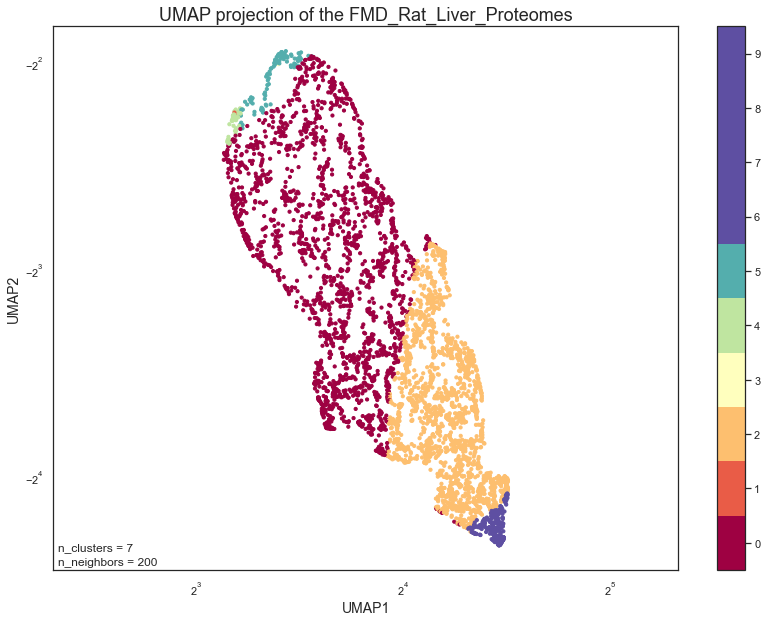

In [124]:
draw_umap(n_clusters=7, n_neighbors=200, title='UMAP projection of the FMD_Rat_Liver_Proteomes')